In [1]:
import pandas as pd
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


In [2]:
#load stock data
stock=yf.Ticker("NVDA")
stock=stock.history(period= "max")

In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0
2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0
2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0


In [4]:
stock.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [5]:
nvda = stock.reset_index()

In [6]:
nvda.dtypes

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
dtype: object

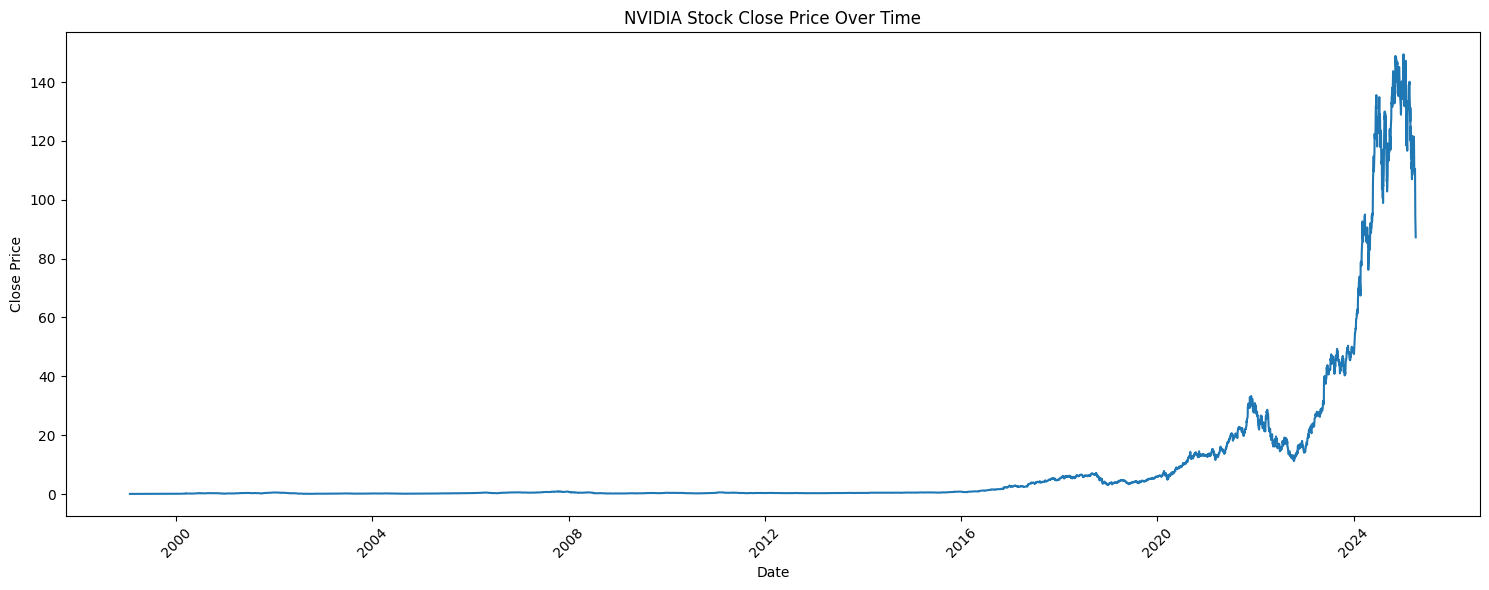

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(nvda['Date'], nvda['Close'])
plt.title('NVIDIA Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
nvda["Tomorrow"] = nvda["Close"].shift(-1)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298
...,...,...,...,...,...,...,...,...,...
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998
6591,2025-04-04 00:00:00-04:00,98.910004,100.129997,92.110001,94.309998,529707700,0.0,0.0,87.250000


In [9]:
nvda["Target"] = (nvda["Tomorrow"] > nvda["Close"]).astype(int)
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
0,1999-01-22 00:00:00-05:00,0.040119,0.044775,0.035581,0.037612,2714688000,0.0,0.0,0.041552,1
1,1999-01-25 00:00:00-05:00,0.040597,0.042029,0.037612,0.041552,510480000,0.0,0.0,0.038328,0
2,1999-01-26 00:00:00-05:00,0.042029,0.042865,0.037731,0.038328,343200000,0.0,0.0,0.038209,0
3,1999-01-27 00:00:00-05:00,0.038447,0.039403,0.036298,0.038209,244368000,0.0,0.0,0.038089,0
4,1999-01-28 00:00:00-05:00,0.038209,0.038447,0.037850,0.038089,227520000,0.0,0.0,0.036298,0
...,...,...,...,...,...,...,...,...,...,...
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0
6591,2025-04-04 00:00:00-04:00,98.910004,100.129997,92.110001,94.309998,529707700,0.0,0.0,87.250000,0


In [10]:
nvda = nvda.loc["2000-01-01":].copy()
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
2001,2007-01-08 00:00:00-05:00,0.516272,0.528192,0.507407,0.518259,657270000,0.0,0.0,0.508172,0
2002,2007-01-09 00:00:00-05:00,0.519022,0.522537,0.507560,0.508172,764166000,0.0,0.0,0.533236,1
2003,2007-01-10 00:00:00-05:00,0.502822,0.537974,0.495180,0.533236,1108746000,0.0,0.0,0.531249,0
2004,2007-01-11 00:00:00-05:00,0.533236,0.537363,0.522537,0.531249,924504000,0.0,0.0,0.538433,1
2005,2007-01-12 00:00:00-05:00,0.523302,0.540572,0.520856,0.538433,698190000,0.0,0.0,0.539350,1
...,...,...,...,...,...,...,...,...,...,...
6588,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1
6589,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0
6590,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0
6591,2025-04-04 00:00:00-04:00,98.910004,100.129997,92.110001,94.309998,529707700,0.0,0.0,87.250000,0


In [11]:
#initiate model
model = RandomForestClassifier(n_estimators=100,min_samples_split=100, random_state=42)
train = nvda.iloc[:-100]
test= nvda.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=42)

In [12]:
predictions = model.predict(test[predictors])
#store pred as a df
predictions = pd.Series(predictions, index=test.index)

In [13]:
precision_score(test["Target"], predictions)

0.5142857142857142

In [14]:
combined = pd.concat([test["Target"], predictions], axis=1)

In [15]:
combined

,Target,0
6493,1,0
6494,0,0
6495,1,0
6496,0,0
6497,0,0
...,...,...
6588,1,1
6589,0,1
6590,0,1
6591,0,1


<Axes: >

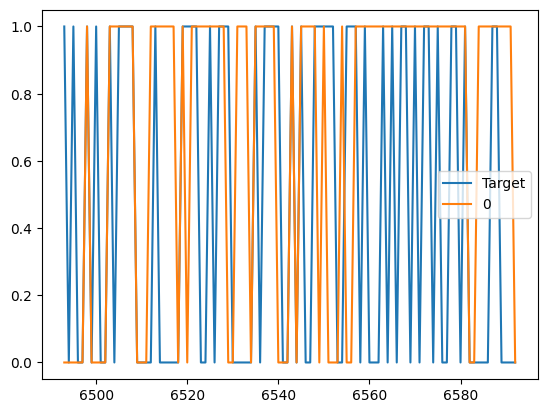

In [16]:
combined.plot()

In [17]:
def predict(train, test, predictors, model): 
        model.fit(train[predictors], train["Target"])
        predictions = model.predict(test[predictors])
        predictions = pd.Series(predictions, index=test.index, name = "Predictions")
        combined = pd.concat([test["Target"], predictions], axis=1)
        return combined

In [18]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [19]:
predictions = backtest(nvda, model, predictors)

In [20]:
predictions["Predictions"].value_counts()

Predictions
0    1316
1     776
Name: count, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5335051546391752

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.541587
0    0.458413
Name: count, dtype: float64

In [23]:
# Prepare a copy of the DataFrame
nvda = nvda.copy()

# Reset the index to make Date a column
nvda = nvda.reset_index(drop=True)

In [24]:
def create_safe_features(df):
    # Prepare a copy of the DataFrame
    nvda = df.copy()
    
    # List of horizons
    horizons = [2, 5, 60, 250, 1000]
    
    # Initialize new predictors list
    new_predictors = []
    
    # Numeric columns for rolling calculations
    numeric_columns = ["Close", "Volume", "Open", "High", "Low"]
    
    # Rolling average calculations
    for horizon in horizons:
        for col in numeric_columns:
            # Rolling average
            rolling_avg_column = f"{col}_RollingAvg_{horizon}"
            nvda[rolling_avg_column] = nvda[col].rolling(window=horizon, min_periods=1).mean()
            new_predictors.append(rolling_avg_column)
            
            # Close ratio (current value / rolling average)
            ratio_column = f"{col}_Ratio_{horizon}"
            nvda[ratio_column] = nvda[col] / nvda[rolling_avg_column]
            new_predictors.append(ratio_column)
    
    # Add percentage change features
    for col in numeric_columns:
        pct_change_column = f"{col}_PctChange"
        nvda[pct_change_column] = nvda[col].pct_change()
        new_predictors.append(pct_change_column)
    
    # Drop any rows with NaN values
    nvda = nvda.dropna()
    
    return nvda, new_predictors

# Then replace your existing feature engineering with:
nvda, new_predictors = create_safe_features(nvda)

In [25]:
nvda

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,...,Open_Ratio_1000,High_RollingAvg_1000,High_Ratio_1000,Low_RollingAvg_1000,Low_Ratio_1000,Close_PctChange,Volume_PctChange,Open_PctChange,High_PctChange,Low_PctChange
1,2007-01-09 00:00:00-05:00,0.519022,0.522537,0.507560,0.508172,764166000,0.0,0.0,0.533236,1,...,1.002657,0.525365,0.994618,0.507483,1.000151,-0.019463,0.162636,0.005328,-0.010707,0.000302
2,2007-01-10 00:00:00-05:00,0.502822,0.537974,0.495180,0.533236,1108746000,0.0,0.0,0.531249,0,...,0.980723,0.529568,1.015874,0.503382,0.983706,0.049323,0.450923,-0.031214,0.029542,-0.024390
3,2007-01-11 00:00:00-05:00,0.533236,0.537363,0.522537,0.531249,924504000,0.0,0.0,0.538433,1,...,1.029735,0.531517,1.010999,0.508171,1.028270,-0.003726,-0.166172,0.060487,-0.001137,0.055246
4,2007-01-12 00:00:00-05:00,0.523302,0.540572,0.520856,0.538433,698190000,0.0,0.0,0.539350,1,...,1.008424,0.533328,1.013583,0.510708,1.019871,0.013522,-0.244795,-0.018629,0.005973,-0.003217
5,2007-01-16 00:00:00-05:00,0.542559,0.542865,0.533236,0.539350,711864000,0.0,0.0,0.528039,0,...,1.037658,0.534917,1.014857,0.514463,1.036491,0.001703,0.019585,0.036799,0.004241,0.023768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,2025-03-31 00:00:00-04:00,105.129997,110.959999,103.650002,108.379997,299212700,0.0,0.0,110.150002,1,...,1.997521,53.609200,2.069794,51.520073,2.011837,-0.011763,0.301646,-0.057045,-0.016922,-0.049693
4587,2025-04-01 00:00:00-04:00,108.519997,110.199997,106.470001,110.150002,222614000,0.0,0.0,110.419998,1,...,2.058245,53.704962,2.051952,51.612327,2.062879,0.016331,-0.256001,0.032246,-0.006849,0.027207
4588,2025-04-02 00:00:00-04:00,107.290001,111.980003,106.790001,110.419998,220601200,0.0,0.0,101.800003,0,...,2.031329,53.802566,2.081313,51.704974,2.065372,0.002451,-0.009042,-0.011334,0.016153,0.003006
4589,2025-04-03 00:00:00-04:00,103.510002,105.629997,101.599998,101.800003,338769400,0.0,0.0,94.309998,0,...,1.956456,53.892879,1.959999,51.792467,1.961675,-0.078066,0.535664,-0.035232,-0.056707,-0.048600


Cross-Validation Results:
Precision: 0.5342 ± 0.0131
Recall: 0.5687 ± 0.0148
F1 Score: 0.5509 ± 0.0127


<Figure size 1000x600 with 0 Axes>

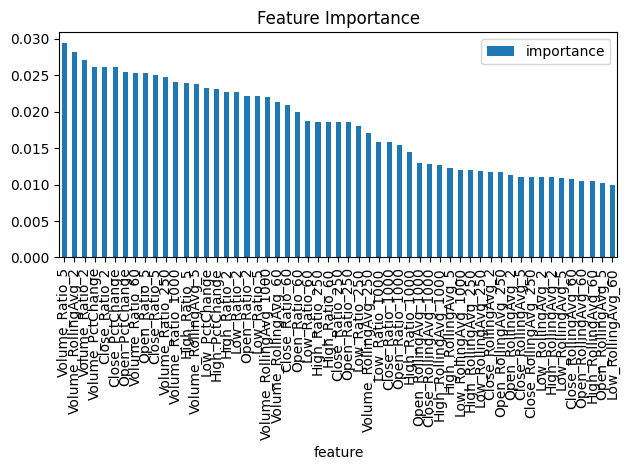


Top 10 Most Important Features:
                feature  importance
13       Volume_Ratio_5    0.029441
2   Volume_RollingAvg_2    0.028163
3        Volume_Ratio_2    0.027165
51     Volume_PctChange    0.026220
1         Close_Ratio_2    0.026178
50      Close_PctChange    0.026174
52       Open_PctChange    0.025527
23      Volume_Ratio_60    0.025359
15         Open_Ratio_5    0.025270
11        Close_Ratio_5    0.024989


In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# More robust cross-validation
def robust_evaluation(X, y, model):
    # Stratified K-Fold to maintain class distribution
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Metrics to track
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Clone the model to avoid state contamination
        cv_model = clone(model)
        
        # Fit and predict
        cv_model.fit(X_train[new_predictors], y_train)
        y_pred = cv_model.predict(X_test[new_predictors])
        
        # Calculate metrics
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    
    # Print results
    print("Cross-Validation Results:")
    print(f"Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

# Improved model configuration
from sklearn.base import clone
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier(
    n_estimators=300,  # Increase trees
    min_samples_split=30,  # More granular splitting
    max_depth=15,  # Prevent overfitting
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Perform robust evaluation
robust_evaluation(nvda, nvda['Target'], model)

# Feature importance analysis
def analyze_feature_importance(model, features):
    importances = model.fit(nvda[features], nvda['Target']).feature_importances_
    feature_imp = pd.DataFrame({
        'feature': features,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_imp.plot(x='feature', y='importance', kind='bar')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_imp

# Analyze top features
feature_importance = analyze_feature_importance(model, new_predictors)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [27]:
predictions = backtest(nvda, model, new_predictors)

In [28]:
predictions["Predictions"].value_counts()

Predictions
0    1289
1     801
Name: count, dtype: int64

In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

0.533083645443196

In [30]:
# Check prediction distribution
print(predictions["Predictions"].value_counts())

# Check actual target distribution
print(predictions["Target"].value_counts())

# Confusion matrix can provide more insight
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])
print("Confusion Matrix:\n", cm)

Predictions
0    1289
1     801
Name: count, dtype: int64
Target
1    1133
0     957
Name: count, dtype: int64
Confusion Matrix:
 [[583 374]
 [706 427]]
